<center><span style="font-family: TimesNewRoman; font-size:1.4em;color:blue;"><b>  LinearRegression:  Predict Price for Used Car in India</b></span></center><br>
<center><img src=https://images.unsplash.com/photo-1506883968894-6e7738ccfc05?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=800&q=80 width="400" height="300"></center>
<p size=1 ><i>image source:Meriç Dağlı on Unsplash</i></p>
<br>

Here are my other notebooks....Do checkout if you find my work helpful, happy learning.

1.[Predicting diabetes ](https://www.kaggle.com/yogidsba/diabetes-prediction-eda-model)

2.[Predict if customer will buy Personsal Loan](https://www.kaggle.com/yogidsba/personal-loan-logistic-regression-decision-tree/edit/run/65292079)

3.[Insurance Claim Hypothesis Testing](http://www.kaggle.com/yogidsba/insurance-claims-eda-hypothesis-testing)

4.[Basic EDA on Covid vaccination](http://www.kaggle.com/yogidsba/basic-eda-on-covid-vaccination)

5.[Pandas Tutorial](http://www.kaggle.com/yogidsba/pandas-function-and-data-analysis)

6.[Case study EDA on cardio good fitness](http://www.kaggle.com/yogidsba/casestudy-eda-for-cardio-good-fitness)

****This is my first time training a model. I am using statmodel and checking for all Linear regression assumptions.Special thanks to people on kaggle who answered by queries related to dummy variables and log transform. I hope this notebook helps you the way it helped me.****

## Context
    
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.
In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.</p>

<p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Table of Contents</b>
</p><br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
- [Data Set](#Data-Set)

-  [Problem](#Problem)

- [Libraries](#Libraries)

- [Read and Understand Data](#Read-and-Understand-data)

- [Data Preprocessing](#Data-Preprocessing)
    
- [Basic EDA](#EDA)    
    
- [Handling Missing Value](#Handling-missing-values)
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    
- [Insights based on EDA](#Insights-based-on-EDA)
  
- [Model Building](#Model-Building)
    
- [Test Assumptions](#Test-Assumptions)
    
- [Recommendation](#Recommendation)

<br>


## Data Set
<br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
1. S.No. : Serial Number<br>
    
2. Name : Name of the car which includes Brand name and Model name<br>
    
3. Location : The location in which the car is being sold or is available for purchase Cities<b<br>r>
    
4. Year : Manufacturing year of the car<br>
    
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
    
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
    
7. Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
    
8. Owner : Type of ownership<br>
    
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg<br>
    
10. Engine : The displacement volume of the engine in CC.<br>
    
11. Power : The maximum power of the engine in bhp.<br>
    
12. Seats : The number of seats in the car.<br>
    
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
    
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)<br>
</p>

## Problem
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

- Does various predicating factors effect the price of the used car .?<br>
- What all  independent variables effect the pricing of used cars?<br>
- Does name of a car have any effect on  pricing of car.?<br>
- How does type of Transmission  effect  pricing?<br>
- Does Location in which the car being sold has any effect on the price?<br>
- Does kilometers_Driven,Year of manufacturing  have negative correlation with  price of the car?<br>
- Does Mileage ,Engine and Power have any effect on the pricing of the car?<br>
- How does number of seat ,Fuel type effect the pricing.?<br>
</p>

# Libraries


In [ ]:
### IMPORT: ------------------------------------
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Read and Understand data

In [ ]:
#Reading the csv file  used car data.csv
data_path='/content/drive/My Drive/project/used_cars_data.csv'
df=pd.read_csv(data_path,index_col=0)
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring


In [ ]:
# inspect data, print top 5
cars.head(5)

In [ ]:
# bottom 5 rows:
cars.tail(5)

In [ ]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values


In [ ]:
cars.info()

In [ ]:
#Visualize missing values
msno.bar(cars)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b></p>
This preview  shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later.

-  **`New_Price`** has only 1006 values. 86 % values are missing

-  **`Price`**, which is a Target variable 17 % missing values.This needs to be analysed further.

-  **`Seats`** has only 53 values missing and number of seats can be one of key factor in deciding price.
-  **`Power`** and **`Engine`** has 46 missing values.

-  **`Mileage`** only has two values missing.

-  **`Mileage`,`Power`,`Engine`,`New_Price`** we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [ ]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",

]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>  Observations</b></p>

 - Maximum car being sold have fuel type as Diesel.
 - Mumbai has highest numbers of car availabe for purchase.
 - 5204 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned.
 - Years of car ranges form 1996- 2015

# Data Preprocessing

### Processing Engine,Power ,Mileage columns

Datatype for Engine ,Power and Mileage  are object because of unit assigned ,so striping  units.

In [ ]:
#np.random.seed(9)
cars[['Engine','Power','Mileage']].sample(10)

In [ ]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since  those units are in  km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

### Mileage

In [ ]:
cars[cars.Mileage.isnull()==True]

In [ ]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")


### Engine

In [ ]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")


### Power

In [ ]:
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)


In [ ]:
#verify the data
num=['Engine','Power','Mileage']
cars[num].sample(20)

I had seen some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [ ]:
cars.query("Power == '0.0'")['Power'].count()


In [ ]:
cars.query("Mileage == '0.0'")['Mileage'].count()


Converting this observations to Nan so we will remember to handle them when handling missing values.

In [ ]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

In [ ]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

In [ ]:
cars[num].nunique()

In [ ]:
cars[num].isnull().sum()

There are 46 missing values in Engine, 175 in  Power,83 in Mileage.

###  Processing Seats

In [ ]:
cars.query("Seats == 0.0")['Seats']

In [ ]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan


###  Processing  New Price
We know that `New_Price` is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.


In [ ]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

In [ ]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5)  # Looks ok

# Feature Enginering

## converting datatype

In [ ]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [ ]:
cars.describe().T

### Processing Years to Derive Age of car
Since year has 2014, 1996  etc. But this will not help to understand how old cars is and its effect on  price.
so creating  two new columns current year and Age . Current year would be 2021 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns


In [ ]:
cars['Current_year']=2021
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

### Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [ ]:
#dropping rows with name as null
#cars['Name'] = cars.dropna(subset=['Name'])

In [ ]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]


In [ ]:
cars.Brand.unique()

In [ ]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [ ]:
cars.info()

In [ ]:
#changing brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [ ]:
cars.Brand.nunique()

In [ ]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [ ]:
cars.Model.isnull().sum()

In [ ]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [ ]:
cars.Model.nunique()

In [ ]:
cars.groupby('Model')['Model'].size().nlargest(30)

There are 726 unique models and Swift Dzire is most popular Model.

# EDA


In [ ]:
cars.info()

In [ ]:
cars.describe()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman"><b>Observations</b></p>

    
- Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuited

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.

- Price 160 Lakh is too much for a used car. Seems to be an outlier.

In [ ]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)

                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
  
- Year is left skewed and has outilers on lower side., This column can be dropped
- Kilometer_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
- Engine ,power and price are  right skewed and has outliers on upper side.
- Age of car is right skewed.


In [ ]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
   
   **Car Profile**
    
-  ~71 % cars available for sell have manual Transmission.
- ~82 % cars are First owned cars.
- ~39% of car available for sale are from  Maruti & Hyundai brands.
-  ~53% of car being sold/avialable for purchase  have fuel type as Diesel .
- Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
- Most of the cars are 5 seaters.
- Car being sold/available for purchase are in  2 - 23 years old
- ~ 71% car are lower price range car.

In [ ]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

# Handling missing values

In [ ]:
cars.isnull().sum()

### Calculating missing values in each row

In [ ]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

In [ ]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

This confirms that certain columns tend to be missing together or all nonmissing together. So will try to fill the missing values , as much as possible.

In [ ]:
cars[num_missing==7]

In [ ]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

We can start filling missing values by grouping  name and year and fill in missing values. with median.

In [ ]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)


In [ ]:
cars['Engine']=cars.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [ ]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

In [ ]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

As we can see most of the model have same engine
size and instead  of just applying median , grouping with model and year that should give me more granularity, and near to accurate Engine values.


In [ ]:
#chosing Median to fill the the missing value as there are many outliers,
#grouping by model and year to get  more granularity and more accurate Engine and then fillig with median
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))


In [ ]:
#chosing Median to fill the the missing value as there are many outliers,
#grouping by model to get more granularity and more accurate Engine
cars['Power']=cars.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [ ]:
#chosing Median to fill the the missing value as there are many outliers,
#grouping by model to get more granularity and more accurate Engine
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))


In [ ]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()


 There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For  Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [ ]:
cars.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

In [ ]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

In [ ]:
cars['Seats'].isnull().sum()

Grouping with Name should give me more granularity, and near to accurate Seat values.

In [ ]:
cars['Seats']=cars.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
cars['Seats'].isnull().sum()

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [ ]:
cars['Seats']=cars.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
cars['Seats'].isnull().sum()

 Lets check which car types have missing values.

In [ ]:
cars[cars['Seats'].isnull()==True].head(10)

In [ ]:
#most of cars are 5 seater so fillrest of 23 by 5
cars['Seats']=cars['Seats'].fillna(5)

In [ ]:
cars['Seats'].isnull().sum()

Need to analyse along with price if seats plays any role in price

In [ ]:

cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [ ]:
cars.info()

In [ ]:
cars.shape

# Processing New Price

In [ ]:
#For better granualarity grouping has there would be same car model present so filling with a median value brings it more near to real value
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [ ]:
cars.shape

In [ ]:
cars.new_price_num.isnull().sum()

In [ ]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [ ]:
cars.new_price_num.isnull().sum()

In [ ]:
cars['new_price_num']=cars.groupby(['Brand','Model'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [ ]:
cars.new_price_num.isnull().sum()

In [ ]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [ ]:
W=cars.copy()

In [ ]:
cars=W.copy()

In [ ]:
W.head()

In [ ]:
cars.shape

In [ ]:
cars.drop(['new_price_num'],axis=1)

In [ ]:
cars.new_price_num.isnull().sum()

In [ ]:
cars.shape

In [ ]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

In [ ]:
cars.isnull().sum()

In [ ]:
cars.shape

In [ ]:

cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [ ]:
#dropping remaining rows
#cannot further fill this rows so dropping them

cars.dropna(inplace=True,axis=0)

In [ ]:
cars.shape

In [ ]:
cars.isnull().sum()

In [ ]:
cars.head()

In [ ]:
cars.isnull().sum()

In [ ]:
df.shape

Finally done with all missing  values handling

In [ ]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

In [ ]:
#using business knowledge to create class
Low=['Maruti',
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [ ]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else:
        return x

In [ ]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))

In [ ]:
cars['Brand_Class'].unique()

In [ ]:
cars['Engine']=cars['Engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')

### Bivariate & Multivariate Analysis

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

    
- Engine has strong positive correlation to Power [0.86].
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative  correlation to age of car.
- Kilometer driven doesnt impact Price


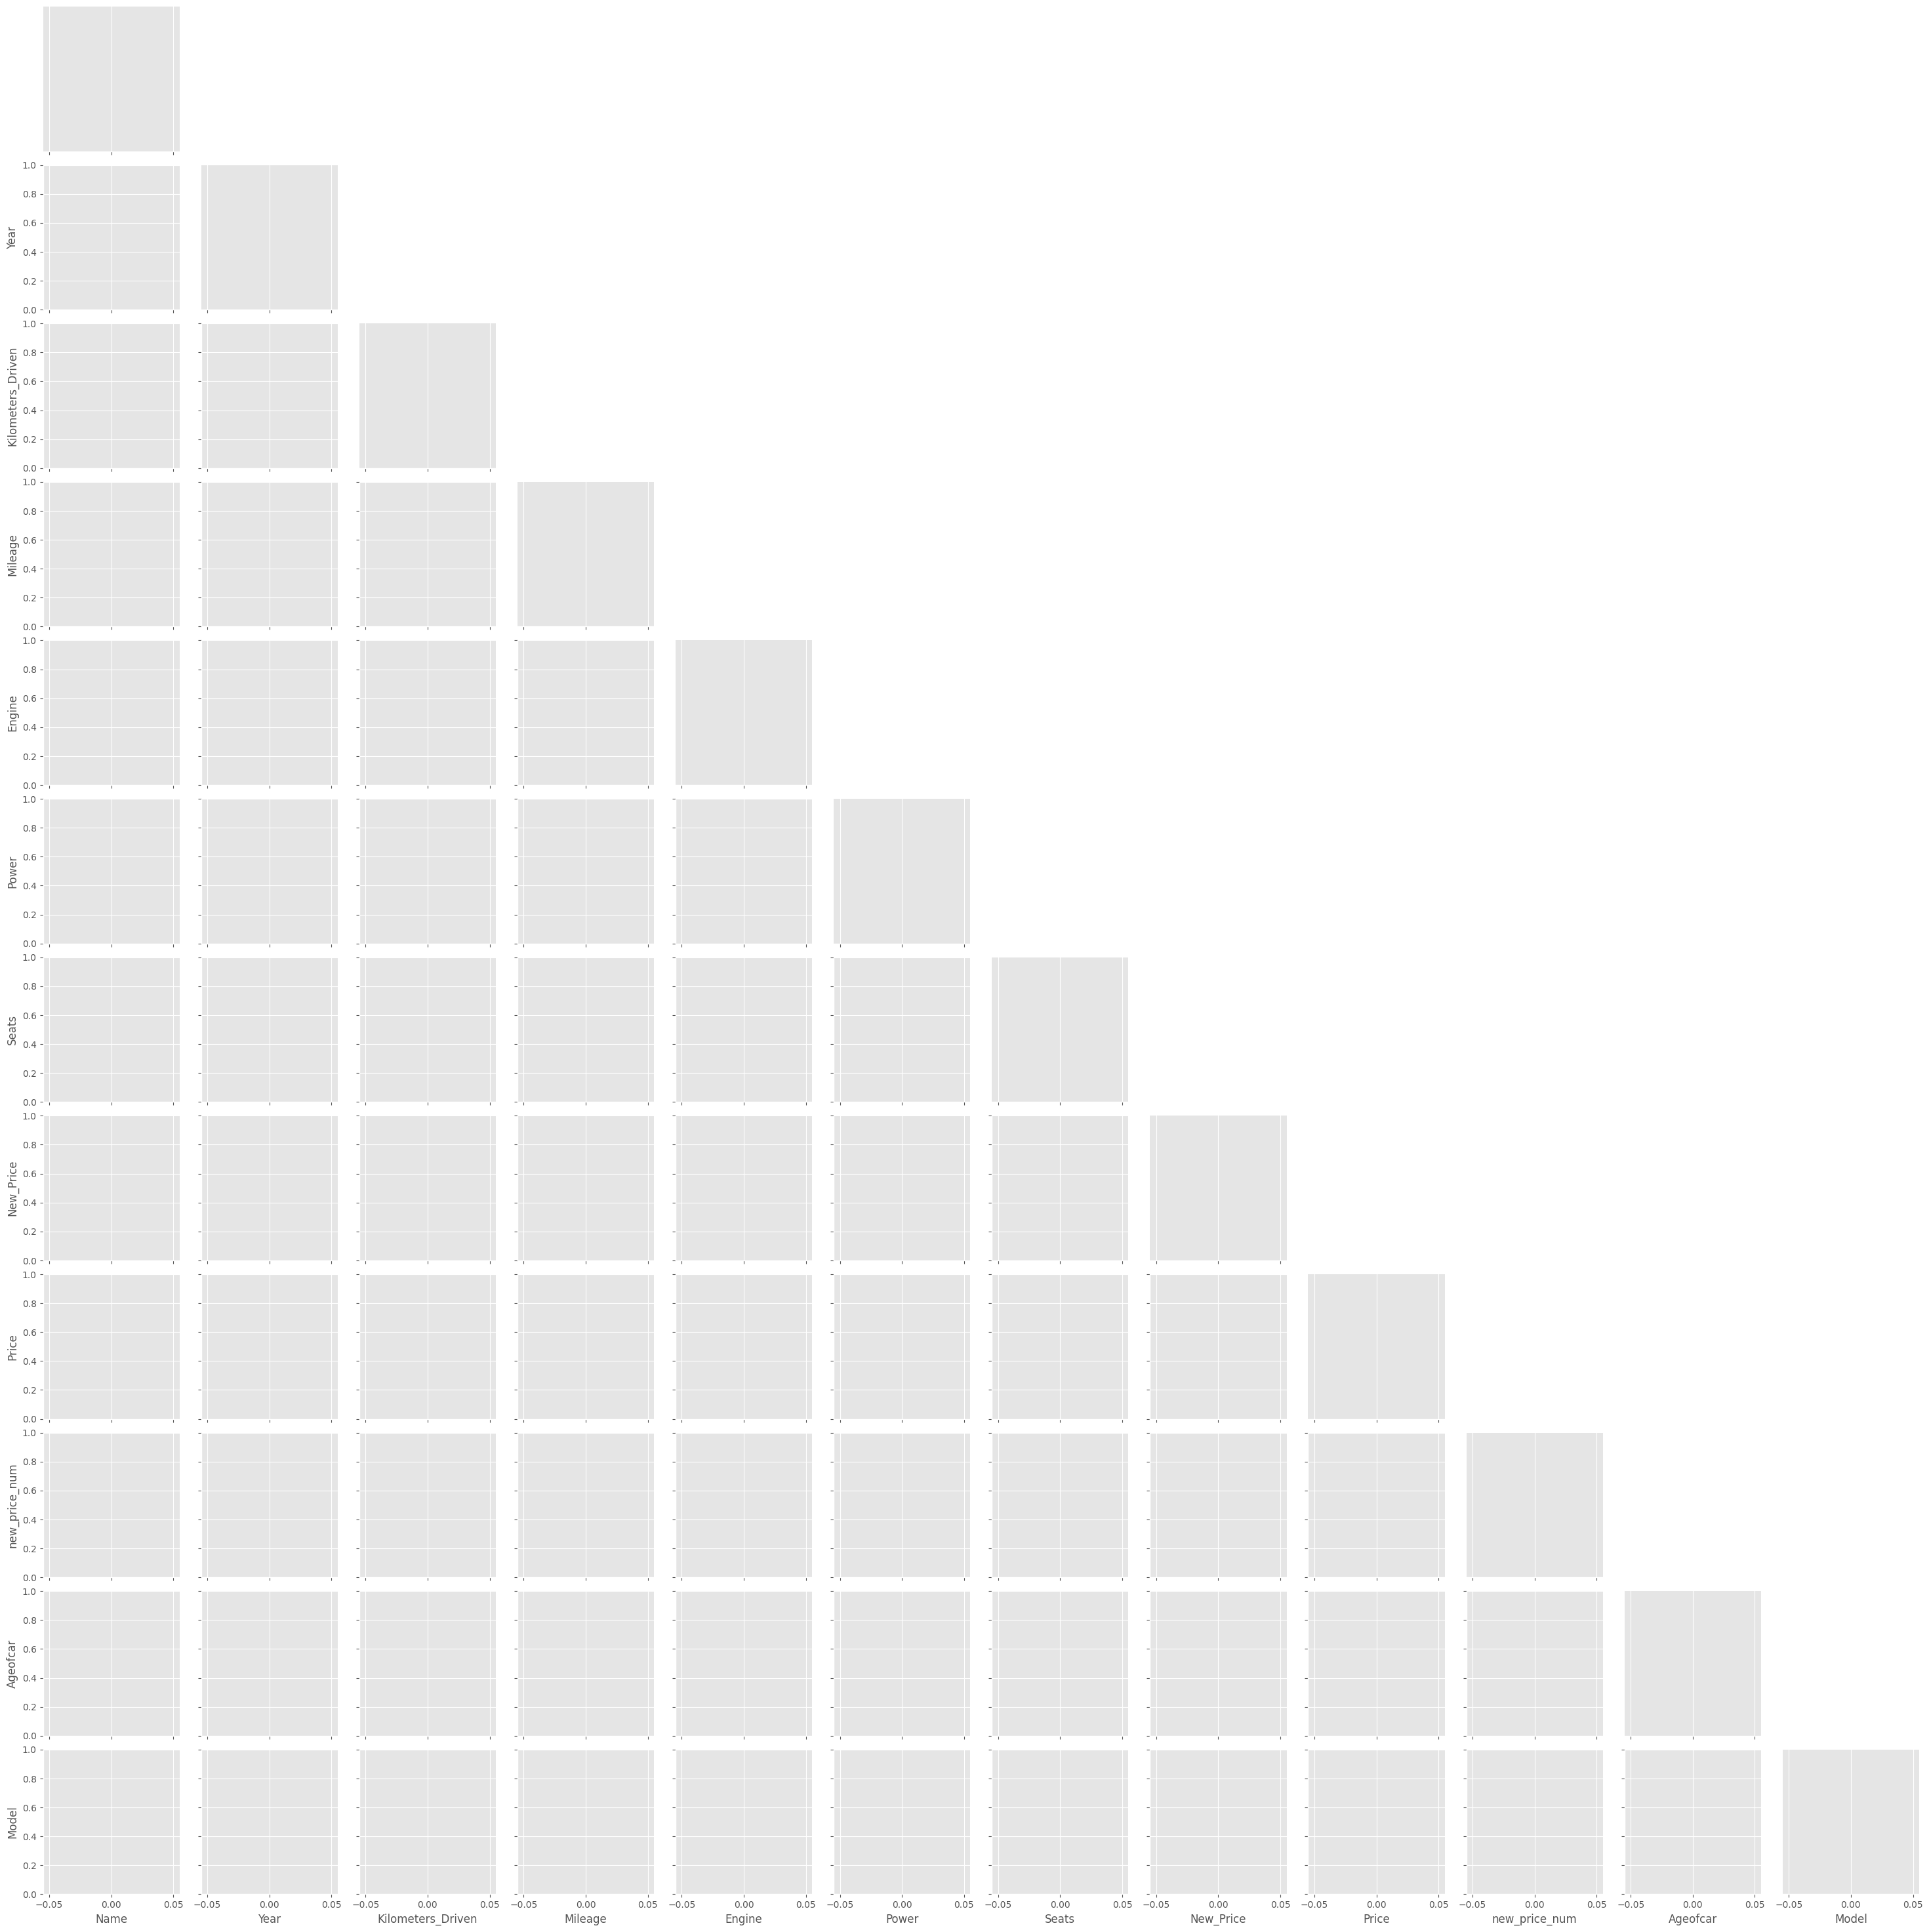

In [199]:
sns.pairplot(data=cars , corner=True)
plt.show()

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
- Same observation  about correlation as seen in heatmap.

- Kilometer driven  doesnot have impact on  Price .
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

### Variables that are correlated with Price variable

#### Price  Vs Engine Vs Transmission

<Axes: title={'center': 'Price VS Engine based on Transmission'}>

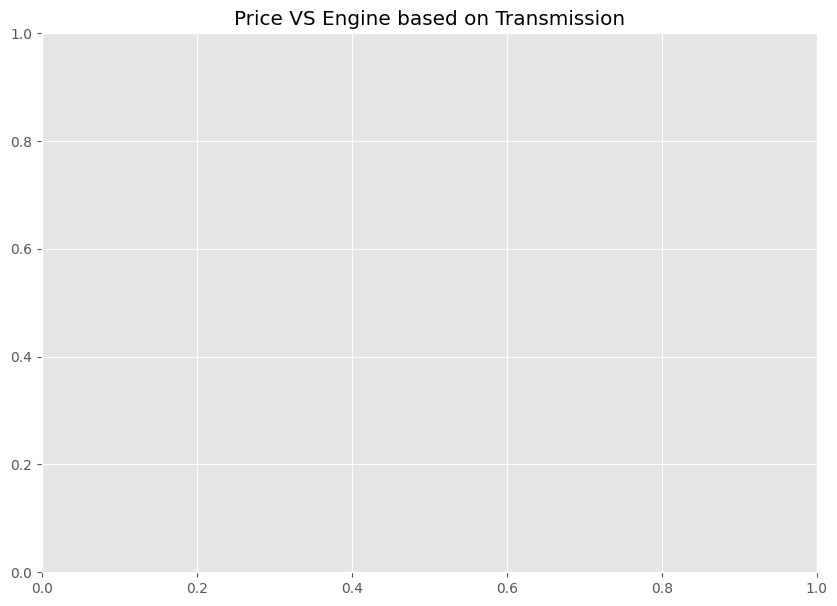

In [200]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

#### Price Vs Power vs Transmission

<Axes: title={'center': 'Price vs Power based on Transmission'}>

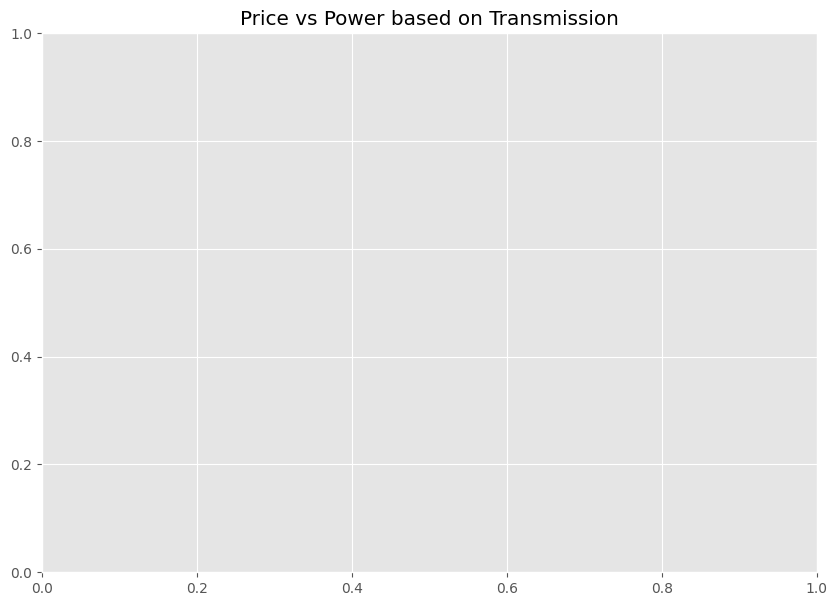

In [201]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

#### Price Vs Mileage Vs Transmission

<Axes: >

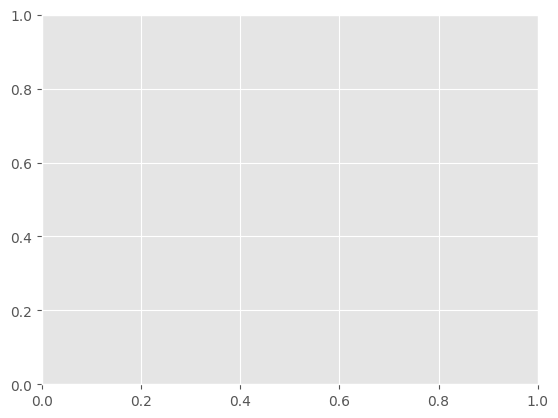

In [202]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

#### Price Vs Year Vs Transmission

<Axes: title={'center': 'Price based on manufacturing Year of model'}>

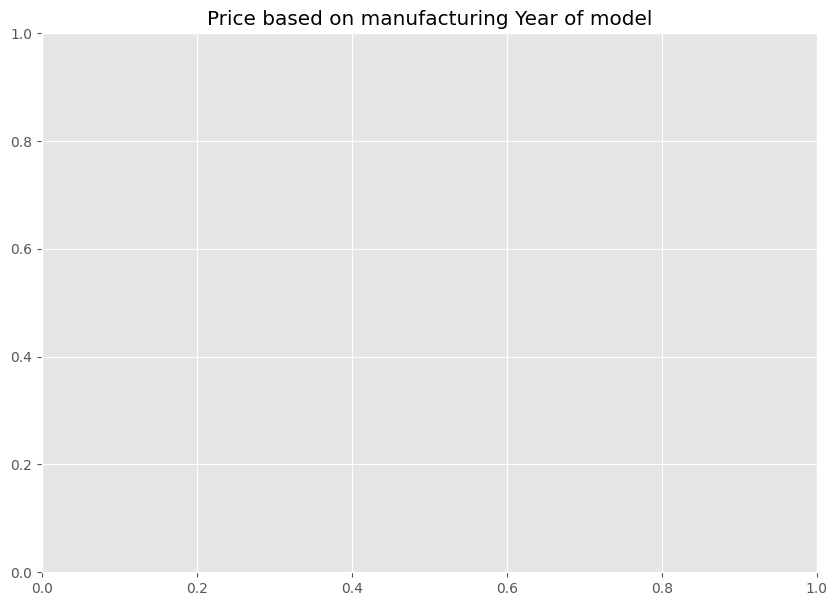

In [203]:
# Impact of years on price
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=cars)


#### Price Vs Year VS Fuel Type

<Axes: title={'center': 'Price Vs Year VS FuelType'}>

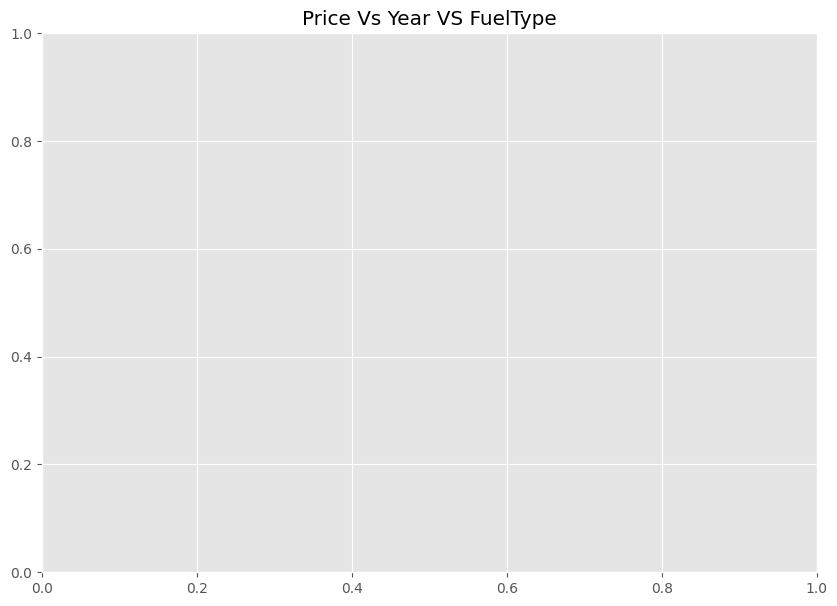

In [204]:
# Impact of years on price
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

#### Year Vs Price Vs Owner_Type

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}>

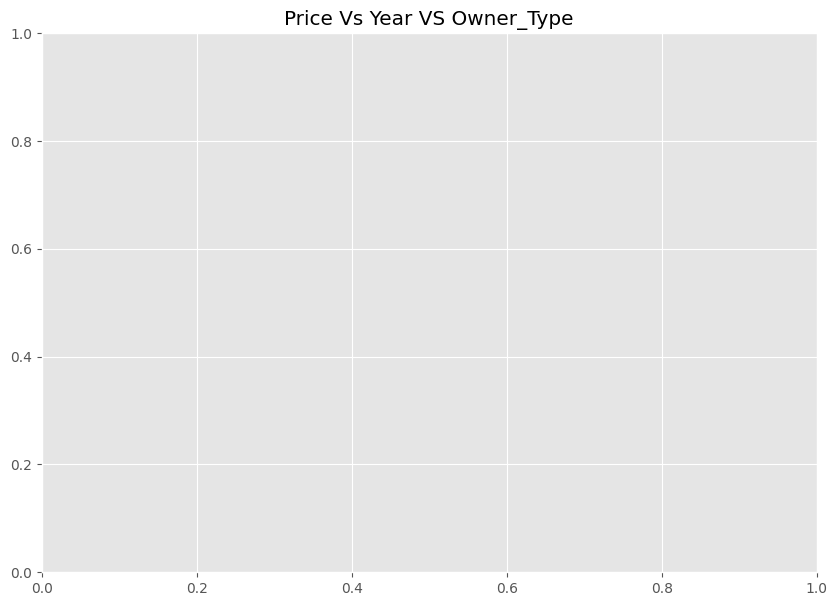

In [205]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=cars)

Need to check the reason for spike in price  for third owner and model in 2010.

In [206]:
cars[(cars["Owner_Type"]=='Third') & (cars["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model,Brand_Class
S.No.,,,,,,,,,,,,,,,,,,


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

In [207]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
count,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Price Vs Mileage vs Fuel_type

<Axes: title={'center': 'Price Vs Mileage'}>

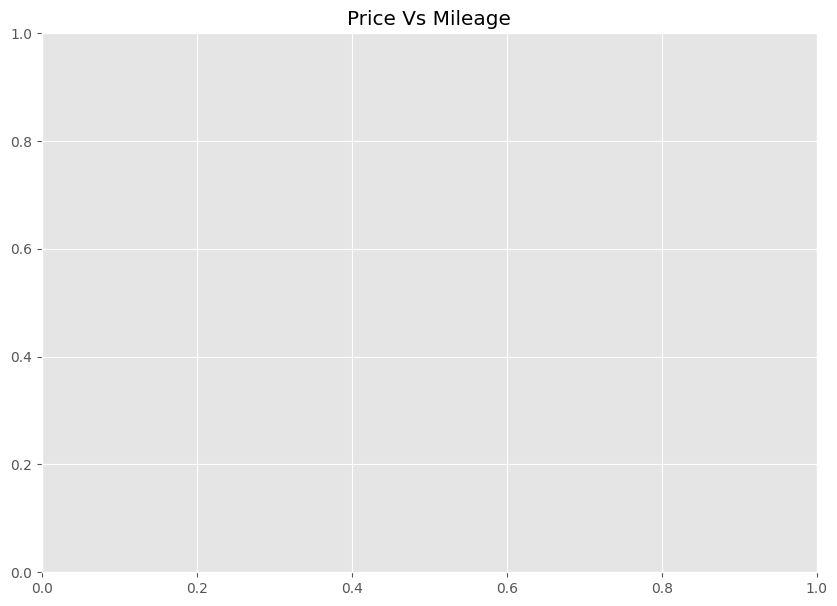

In [208]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

#### Price Vs Seat

In [209]:
#Price and seats
#plt.figure(figsize=(20,15))
#sns.set(font_scale=2)
#sns.barplot(x='Seats', y='Price', data=cars)
#plt.grid()

#### Price Vs Location

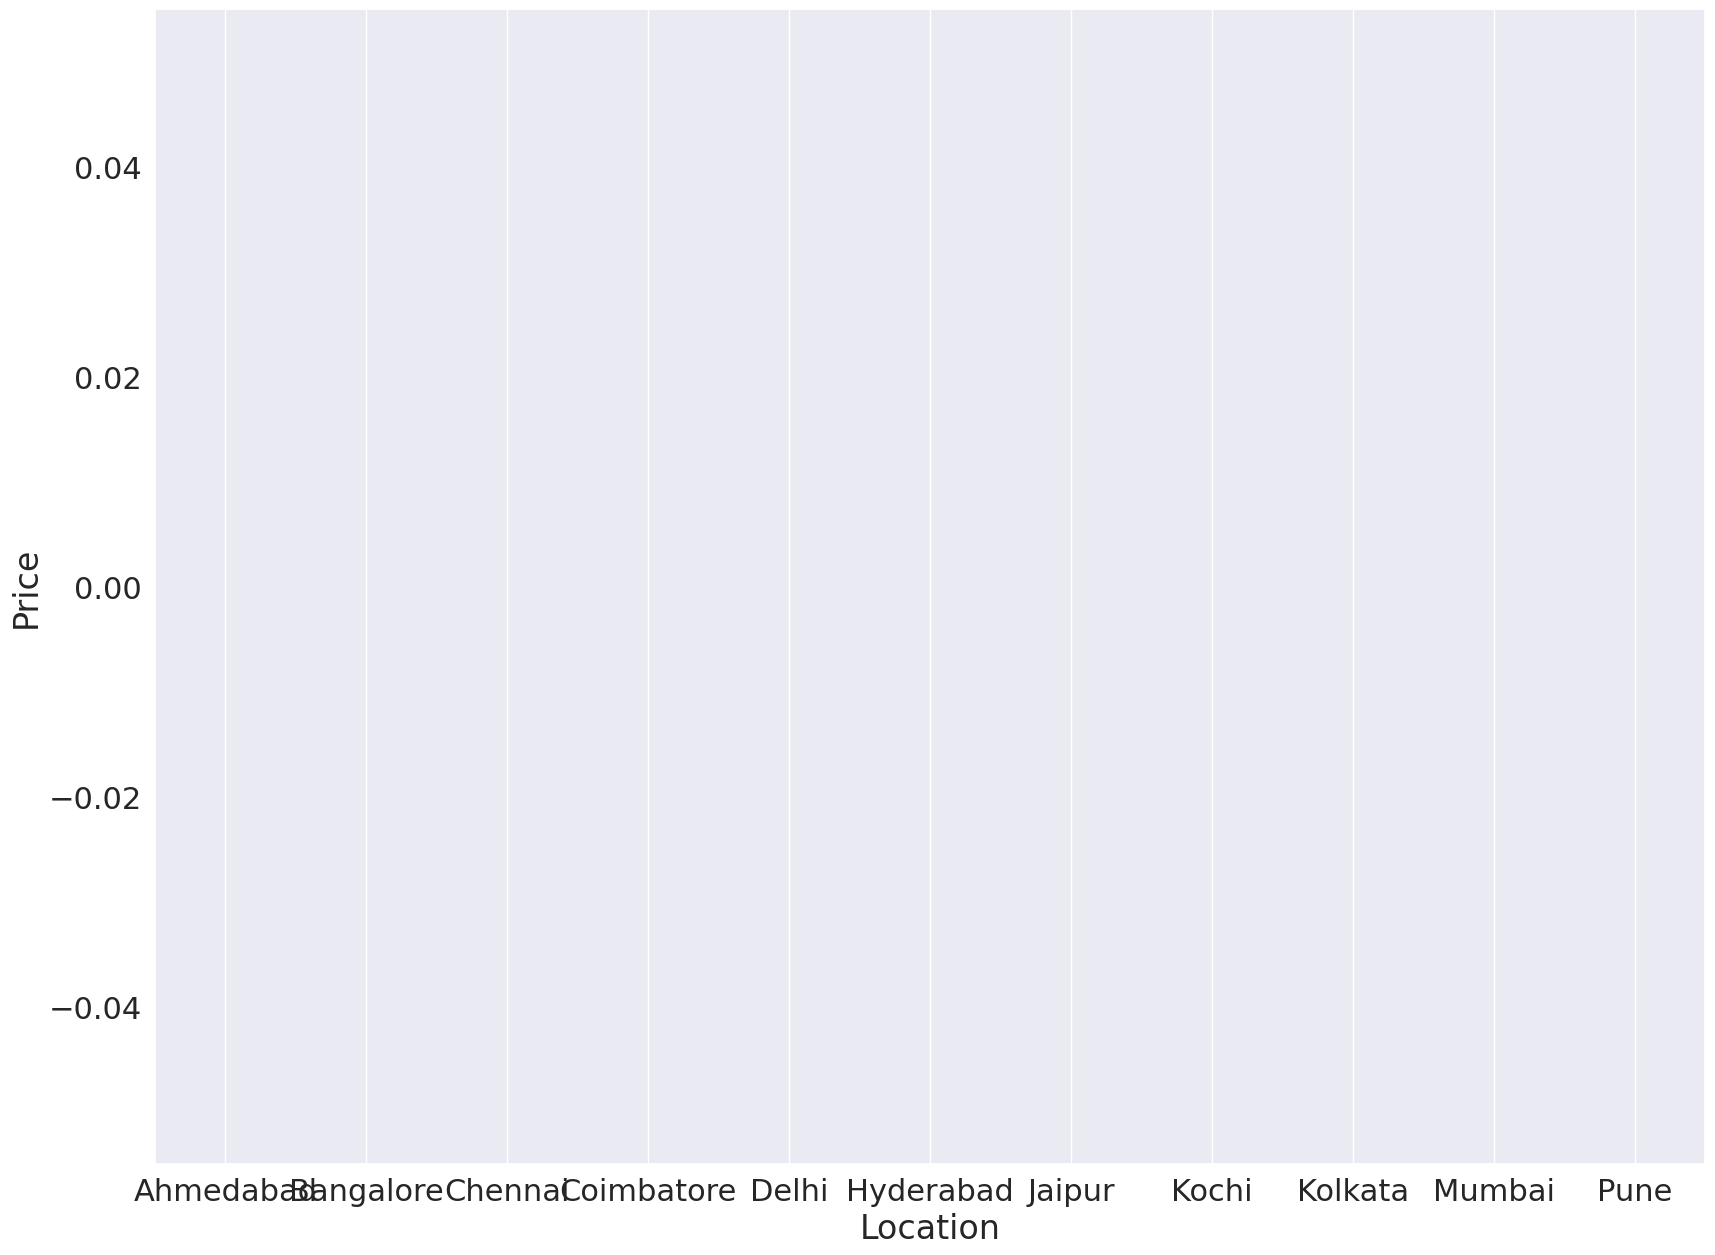

In [210]:
#Price and LOcation
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

#### Price Vs Brand

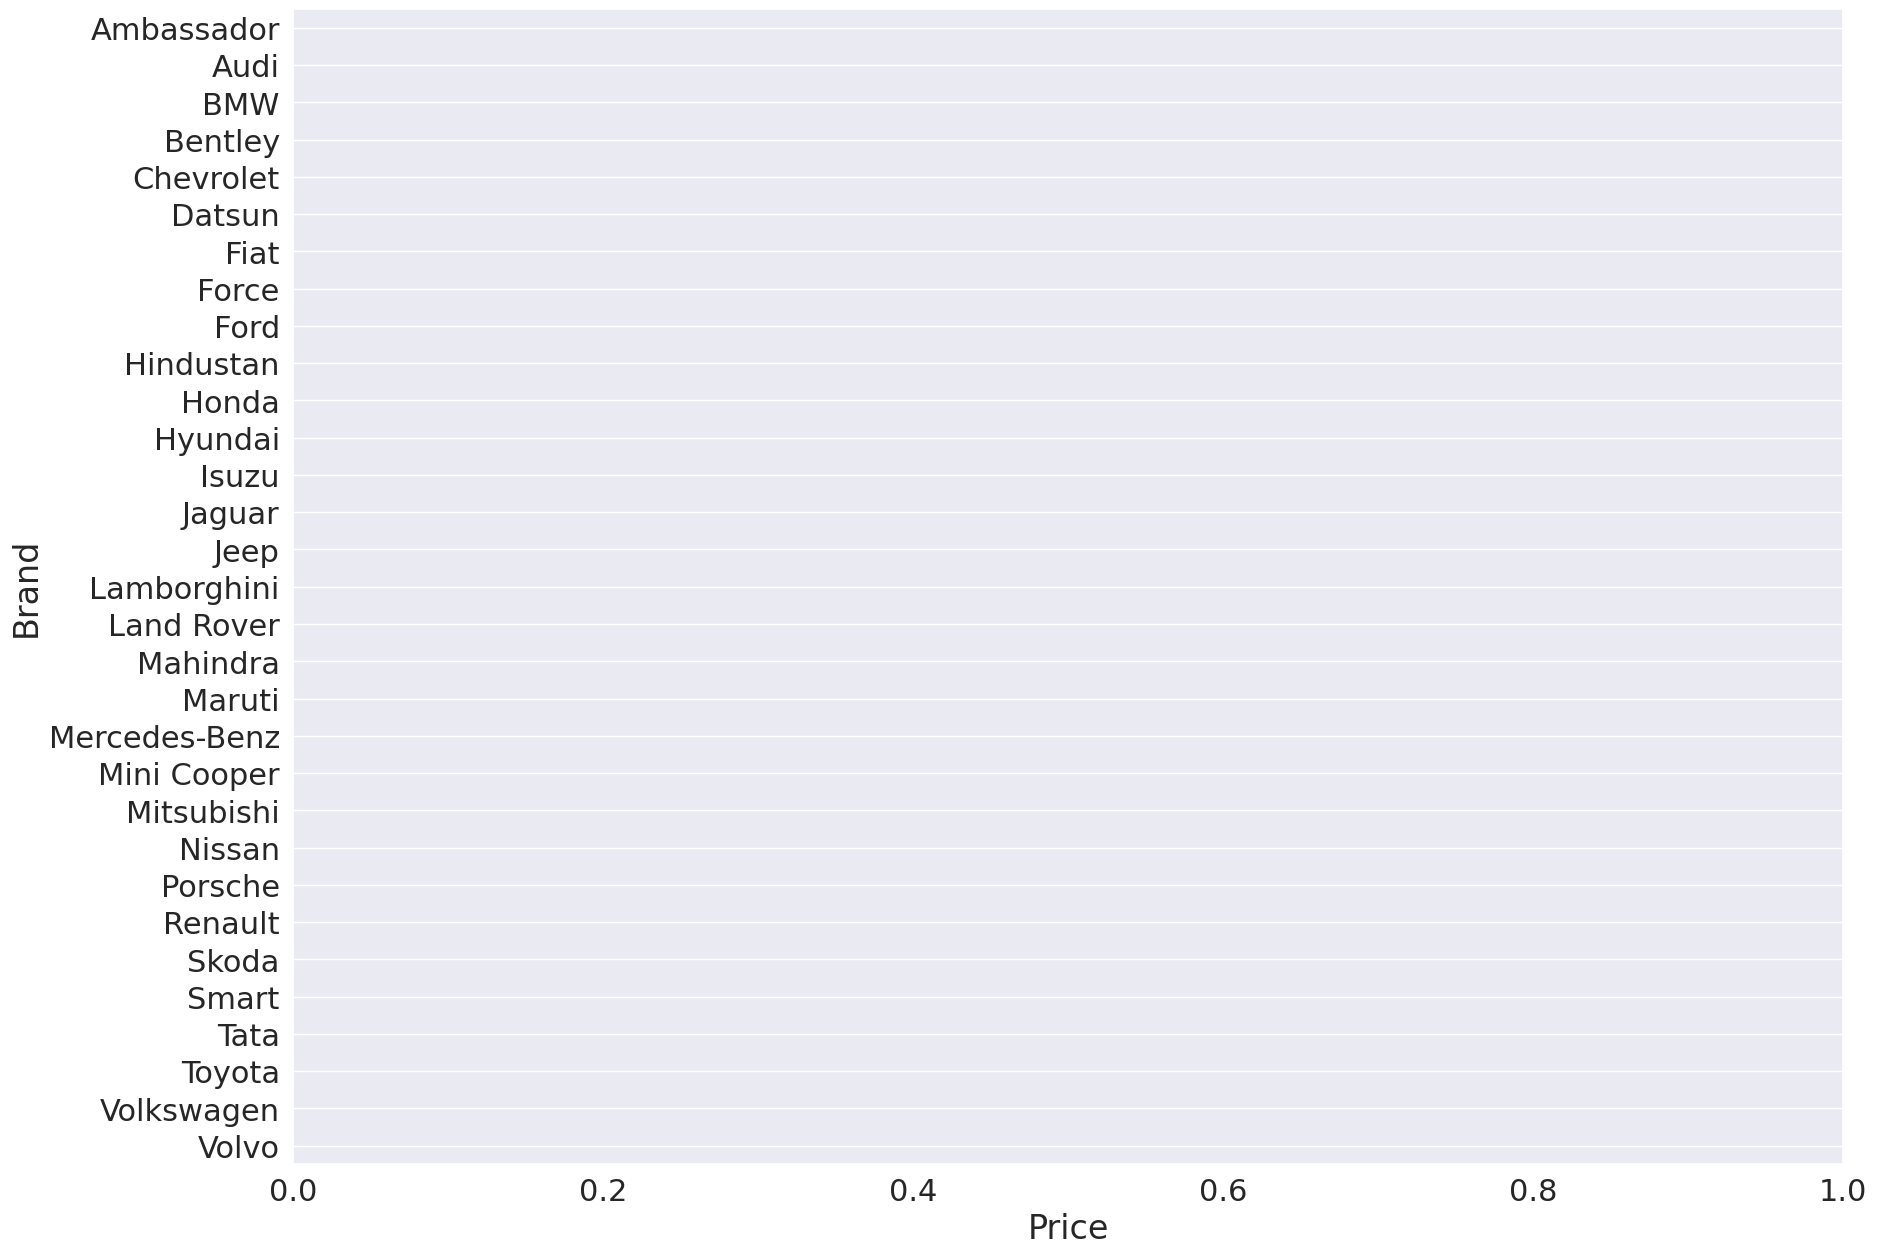

In [211]:
#Price and band
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

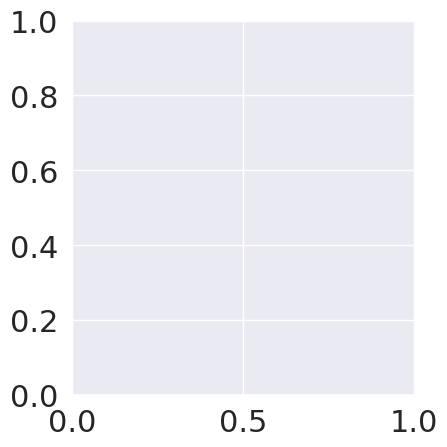

In [212]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5)

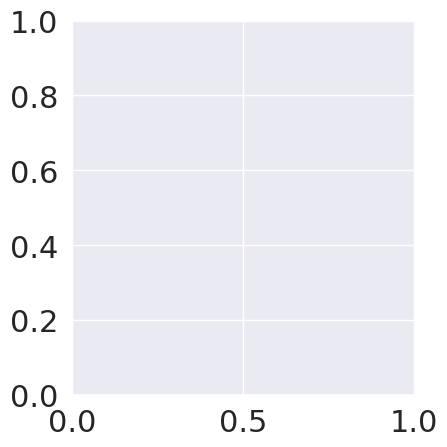

In [213]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

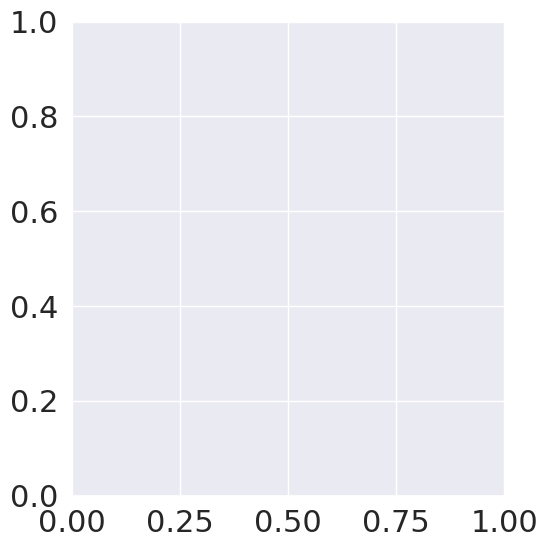

In [214]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

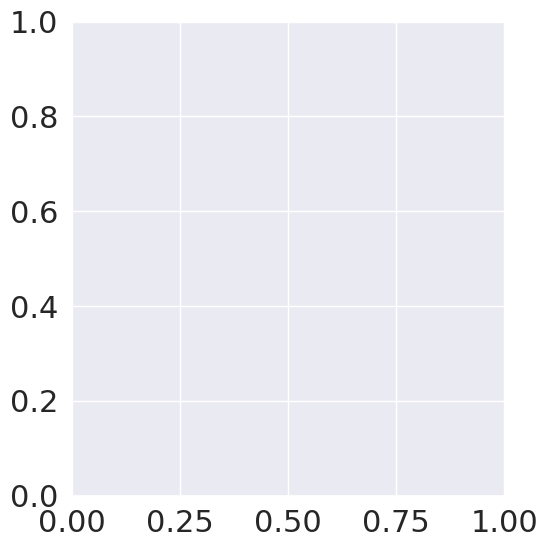

In [215]:

sns.relplot(data=cars, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6)

# Insights based on EDA

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b>
</p>


- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices.
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

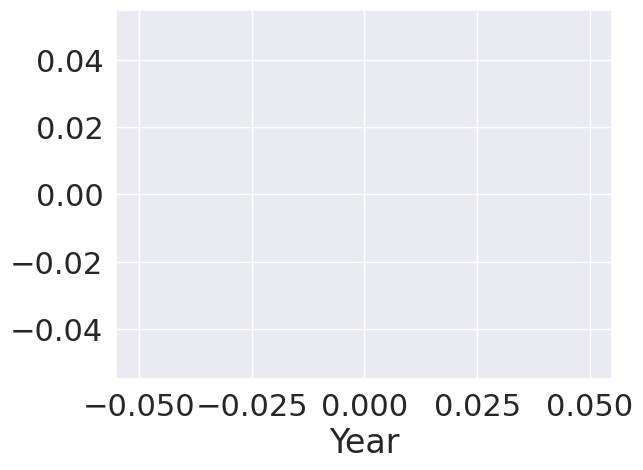

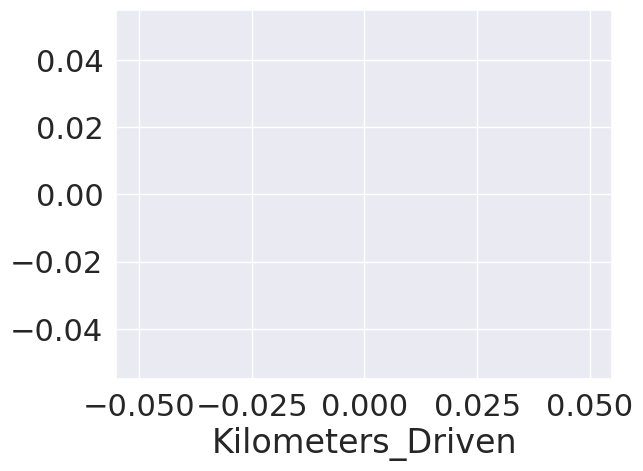

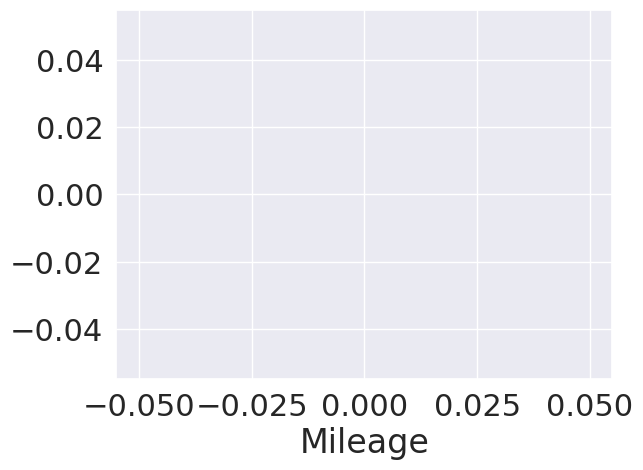

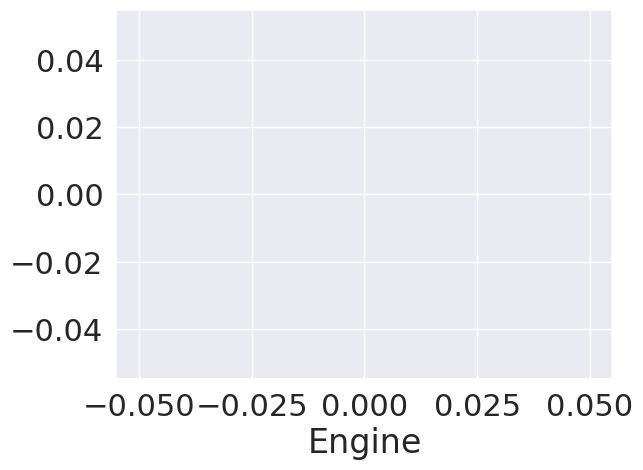

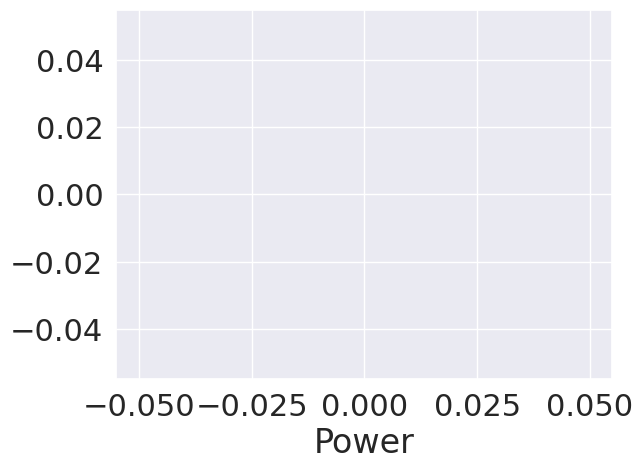

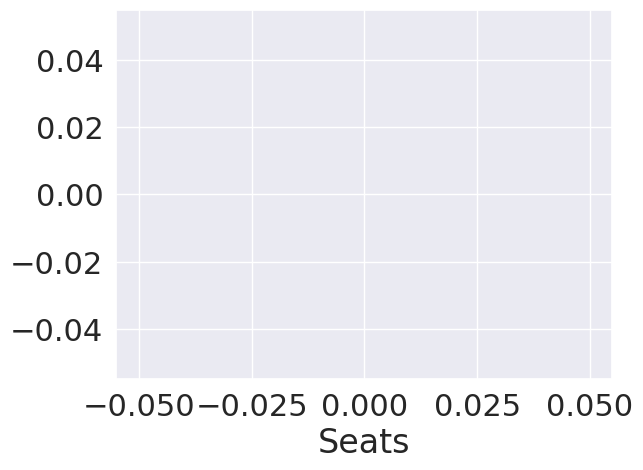

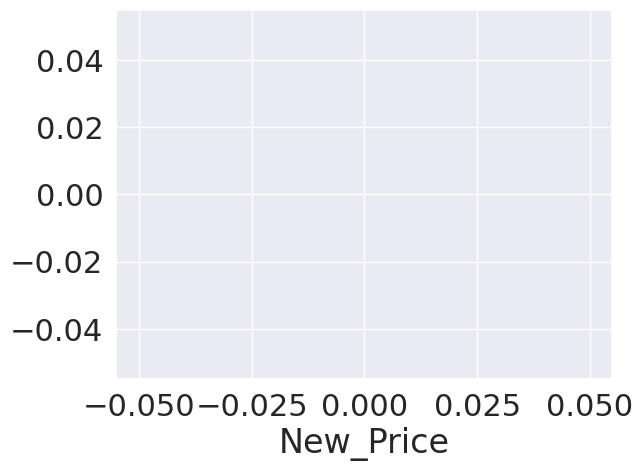

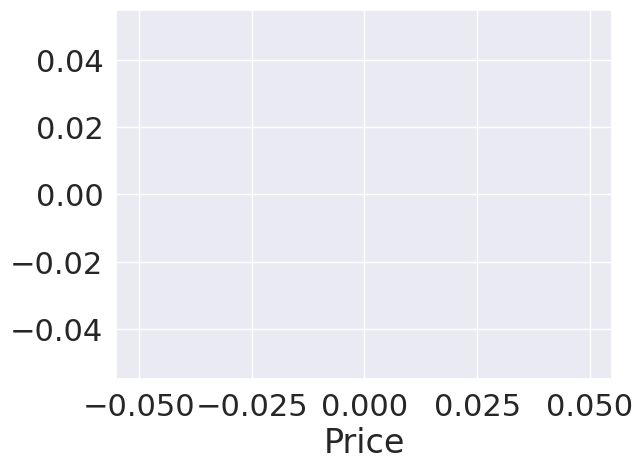

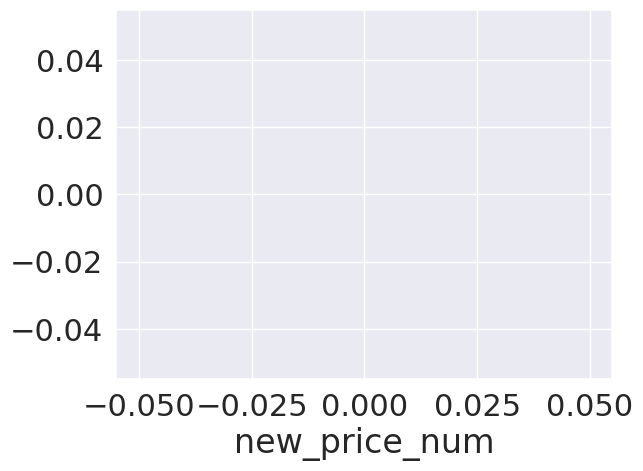

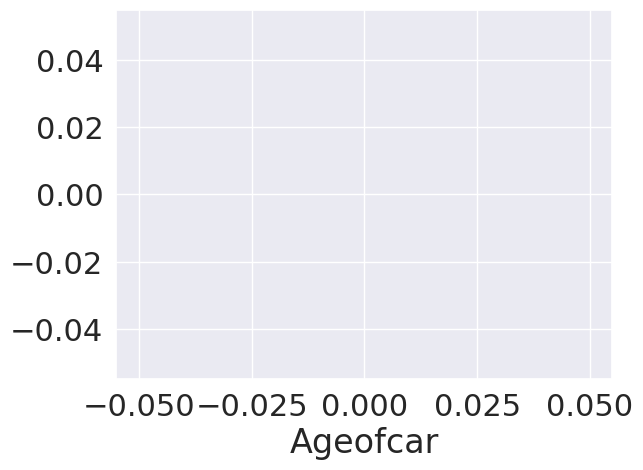

In [216]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

Distrubtions are right skewed , using Log transform can help in normalization

In [217]:

def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [218]:
#This needs to be done before the data is split
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   0 non-null      object  
 1   Location               0 non-null      category
 2   Year                   0 non-null      int64   
 3   Kilometers_Driven      0 non-null      int64   
 4   Fuel_Type              0 non-null      category
 5   Transmission           0 non-null      category
 6   Owner_Type             0 non-null      category
 7   Mileage                0 non-null      float64 
 8   Engine                 0 non-null      int64   
 9   Power                  0 non-null      float64 
 10  Seats                  0 non-null      float64 
 11  New_Price              0 non-null      float64 
 12  Price                  0 non-null      float64 
 13  new_price_num          0 non-null      float64 
 14  Ageofcar               0 non-null      int64   
 15  B

In [219]:
cars.shape

(0, 20)

In [220]:

cars.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [221]:
cars.shape

(0, 15)

In [222]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               0 non-null      category
 1   Kilometers_Driven      0 non-null      int64   
 2   Fuel_Type              0 non-null      category
 3   Transmission           0 non-null      category
 4   Owner_Type             0 non-null      category
 5   Mileage                0 non-null      float64 
 6   Engine                 0 non-null      int64   
 7   Power                  0 non-null      float64 
 8   Seats                  0 non-null      float64 
 9   New_Price              0 non-null      float64 
 10  Price                  0 non-null      float64 
 11  Ageofcar               0 non-null      int64   
 12  Brand_Class            0 non-null      category
 13  Kilometers_Driven_log  0 non-null      float64 
 14  Price_log              0 non-null      float64 
dtypes

In [223]:
cars.shape

(0, 15)

# Model Building

In [224]:
X = cars.drop(["Price", "Price_log"], axis=1)
y = cars[["Price_log", "Price"]]

In [225]:
X.shape

(0, 13)

### Creating dummy variables

In [226]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [227]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,...,Brand_Class_Mitsubishi,Brand_Class_Nissan,Brand_Class_Porsche,Brand_Class_Renault,Brand_Class_Skoda,Brand_Class_Smart,Brand_Class_Tata,Brand_Class_Toyota,Brand_Class_Volkswagen,Brand_Class_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,


In [228]:
pip install scikit-learn

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)  # Reset index and drop the old index column

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

ValueError: ignored

In [231]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

NameError: ignored

In [232]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

NameError: ignored


    
* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 89%
    
* The model is not an underfitting or overfitting model.
    
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
    
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [233]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  # High Overfitting.

NameError: ignored

   
* Root Mean Squared Error of train and test data is not  different, indicating that our model is not overfitting the train data.
    
* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 2.5 lakhs on test data.
    
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
    
* Mean Absolute Percentage Error is ~23% on the test data.

# Test Assumptions

## Checking the Linear Regression Assumptions

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedasticity**
4. **Linearity of variables**
5. **Normality of error terms**

### Checking Assumption 1: No Multicollinearity

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [235]:
# Check VIF
print(checking_vif(X_train))

NameError: ignored

Let us now remove multicollinearity from the model. Engine,power,Fuel_type have high mutlicollinearity.but fuel_type is an important feature in model prediction. So will remove engine.

In [ ]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

In [ ]:
print(checking_vif(X_train1))


We have removed multicollinearity from the data now.Fuel_Type variables are showing high vif because most cars are either diesel and petrol. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

### Checking Assumption 2: Mean of residuals should be 0

In [ ]:
residuals = olsmodel2.resid
np.mean(residuals)

Mean of redisuals is very close to 0. The second assumption is also satisfied.

### Checking Assumption 3: No Heteroscedasticity


* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)


    
Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is also satisfied by our olsmodel2

### Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

In [ ]:
# predicted values
fitted = olsmodel2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodel2. There is no pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

In [236]:
sns.distplot(residuals)

NameError: ignored

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied.
We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel2 follows all the linear regression assumptions. Let us use this model to draw inferences.

In [ ]:
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

## Observations from the model



    
 **It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.**

1. With our linear regression model we have been able to capture ~89 variation in our data.
    
2. The model indicates that the most significant predictors of price of used cars are -
    - Age of the car
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - OwnerType
    - Transmission - Automatic/Manual
        
3. Newer cars sell for higher prices. 1 unit increase in age  of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.


4. As the number of seats increases, the price of the car increases - exp(0.05) = 1.05 Lakhs
    
5. Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.
    
6. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.
    
7. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.

# Recommendations



- Our final Linear Regression model has a MAPE of 23% on the test data, which means that we are able to predict within 23% of the price value. This is a very good model but can be further improved
    
- Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.

   
- Based on Analysis,  we can to divide our cars into 3 segment Low, Medium and High budget.
    
- Brands like Maruti, Hyundai ,Honda are low budget and very popular brands in used car market.
    
- Brands  like BMW, Bentley, Jaguar, Land Rover, Mercedes Benz,Porche,Mini Cooper are high budget cars and are mostly bought by car enthusiast who are ready to buy a  two user owned car at higher price as well.
    
- Brands  like Toyota,Volvo can be Medium budget cars.
    
- Mumbai and Hyderbad seems to be more popular in Used car market, need to verify this with more data from other demographic regions. The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types.
    
- Need to acquire more Automatic cars  to earn more profits, as this car sell at higher prices.
    
- With Increasing petrol rates diesel car are in more demand  in recent years, acquiring and selling them can high profits
    
- Along with this we can include scheme like take a test drive for  half day to pursue customer to buy.
    
- We can provide Car maintenance packages where  customers  pays a small upfront fees and   can bring the car for servicing anytime in a year to attract more customers.
    
  
<b>Important points</b>
- There are more soft parameters which also should be considered when buying a car, the wear and tear the car has been through and how much the company will have to work on car to make it ready for sale.
    
- If the car as already been in some kind of accident that would also effect the price.
    
- Other good to have feature like AC,Moon roof,Airbags can also have impact on the price.
    
- Car model that are too old will depreciate a lot  can impact the demand .